Inspired by https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/machine%20learning%20spaCy.ipynb
and https://www.kaggle.com/mrudhuhas/text-classification-spacy/notebook

In [2]:
import pandas as pd
import numpy as np

In [259]:
df = pd.read_csv("output_forbes.csv", "\t")
#df = pd.read_csv("ouput.csv", "\t")

In [260]:
df.shape

(2000, 10)

In [261]:
df.head(10)

,Unnamed: 0,Rank,Company,Country,Sales,Assets,Market Value,Sector,Industry,Snippet
0,0,1,ICBC,China,151.4,3473.2,229.8,Financials,Major Banks,Die Industrial and Commercial Bank of China Li...
1,1,2,China Construction Bank,China,134.2,3016.6,200.5,Financials,Regional Banks,Die China Construction Bank ist eine der vier ...
2,2,3,Berkshire Hathaway,United States,222.9,620.9,409.9,Financials,Investment Services,05.06.2020 · BERKSHIRE HATHAWAY AKTIE und aktu...
3,3,4,JPMorgan Chase,United States,102.5,2513,306.6,Financials,Major Banks,"JPMorgan Chase & Co.'s website terms, privacy ..."
4,4,5,Wells Fargo,United States,97.6,1943.4,274.4,Financials,Major Banks,https://www.wellsfargo.comWells Fargo does not...
5,5,6,Agricultural Bank of China,China,115.7,2816,149.2,Financials,Regional Banks,https://www.finanzen.net/aktien/agricultural_b...
6,6,7,Bank of America,United States,92.2,2196.8,231.9,Financials,Major Banks,https://www.bankofamerica.comBank of America P...
7,7,8,Bank of China,China,113.1,2611.5,141.3,Financials,Major Banks,https://www.bankofchina.com/de/deBank of China...
8,8,9,Apple,United States,217.5,331.1,752,Information Technology,Computer Hardware,https://www.apple.com/deApple Footer. 1. Finan...
9,9,10,Toyota Motor,Japan,249.9,412.5,171.9,Consumer Discretionary,Auto & Truck Manufacturers,05.06.2020 · TOYOTA MOTOR AKTIE und aktueller ...


In [262]:
df = df.dropna()

In [263]:
df.shape

(1290, 10)

In [264]:
list(df["Sector"].unique())

['Financials',
 'Information Technology',
 'Consumer Discretionary',
 'Telecommunication Services',
 'Industrials',
 'Energy',
 'Health Care',
 'Consumer Staples',
 'Materials',
 'Utilities']

In [265]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20, random_state=42)

In [266]:
print('Company name sample:', train['Company'].iloc[0])
print('Company Bing-snippet:', train['Snippet'].iloc[0])
print('Training Data Shape:', train.shape)
print('Testing Data Shape:', test.shape)

Company name sample: Carlsberg
Company Bing-snippet: Carlsberg ist ein internationales Premium Lager nach Pilsener Brauart mit einem Alkoholgehalt von alc. 5,0% vol, erfrischend mit vollem Biergeschmack. Gebraut nach dem Deutschen Reinheitsgebot. Ecken. Kanten. Holsten. So muss ein Pils sein: herb und erfrischend im Geschmack durch erstklassige Zutaten. Hergestellt nach Hamburger Brautradition und dem deutschen Reinheitsgebot. Astra Urtyp ...
Training Data Shape: (1032, 10)
Testing Data Shape: (258, 10)


In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

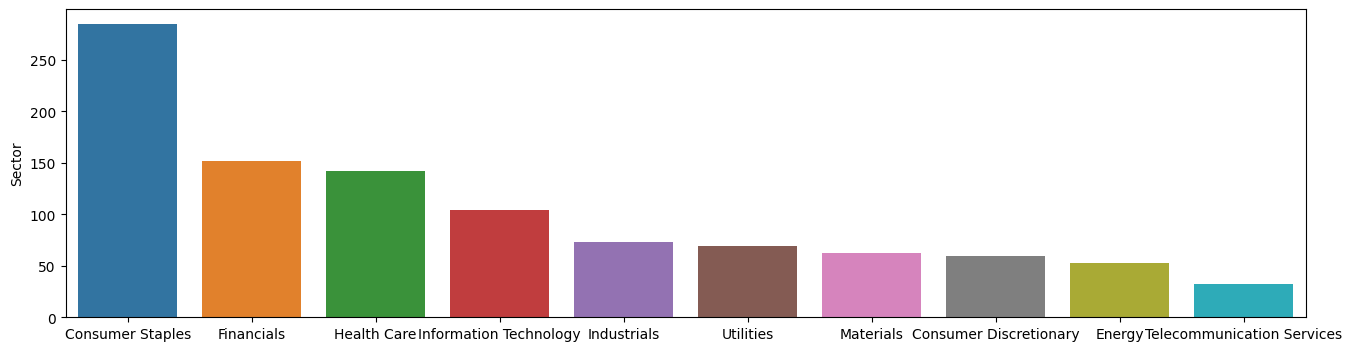

In [268]:
fig = plt.figure(figsize=(16,4))
sns.barplot(x = train['Sector'].unique(), y=train['Sector'].value_counts())
plt.show()

## Process

1. Prepare Snippets  
    a. all lowercase  
    b. remove stopwords  
    c. remove punctuations  
    (OPTIONAL use only NOUNs and ADJs)  
    d. lammatize  
    (OPTIONAL create word embeddings)  
2. Setup Models
3. Train
4. Evaluate

### Prepare Snippets

In [269]:
import spacy
from spacy import displacy

# using the large model
nlp = spacy.load('de_core_news_lg')

In [271]:
def prepare_snippets(snippet, raw_string_return = False, remove_int = False, lowercase = True, stopwords = True, punctuations = True, only_nouns_n_adjs = True, lammatize = True, reduce=True, word_embeddings = True):
    if lowercase:
        snippet = snippet.lower()
    snippet = nlp(snippet)
    if stopwords:
        snippet = [word for word in snippet if word.is_stop == False]
    if punctuations:
        snippet = [word for word in snippet if word.is_punct == False]
    if only_nouns_n_adjs:
        snippet = [word for word in snippet if (word.pos_ == "NOUN" or word.pos_ == "ADJ")]
    if lammatize:
        snippet = [word.lemma_.strip() for word in snippet]
    if reduce:
        snippet = set(snippet)
    if remove_int:
        snippet = ''.join([i for i in snippet if not i.isdigit()])
        try:
            snippet = nlp(snippet)
        except:
            pass
    try:
        snippet = nlp(" ".join(snippet))
    except:
        pass
    if word_embeddings:
        snippet = snippet.vector
    
    if raw_string_return:
        return str(snippet.text)
    
    return snippet    

In [272]:
prepare_snippets(train["Snippet"].iloc[13], only_nouns_n_adjs = True, word_embeddings = False)

neu energiequellen hinzugefügtdte geschäftsjahr elektrisch block erneuerbaren millionen einzig kernkraftwerk unternehmens kohleverstromung aktuell auswahl versorger us-amerikanischer kunden sitzen gas inhalt energie

In [273]:
def explore_snippet(text):    
    doc=nlp(text)
    print(f'Snippet : {doc}')
    print(f'\nTotal number of tokens : {len(doc)} \n')

    for token in doc:
        print(token.text,end=' | ')
        
    print('\n')
    
    for token in doc:
        print(f'{token.text:{12}}{token.pos_:{10}}{token.dep_:{12}}{str(spacy.explain(token.dep_))}')
    
    print(f'\nTotal number of Sentences : {len(list(doc.sents))}')
    for sent in doc.sents:
        print(sent)
        
    if len(doc.ents)>0:
        print(f'\nTotal number of Entity : {len(doc.ents)}\n')    
        for ent in doc.ents:
             print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
        displacy.render(doc,style='ent',jupyter=True)
    
    displacy.render(doc,style='dep',jupyter=True,options={'distance': 80}) 
    
def get_ents(text):
    doc=nlp(text)
    return len(doc.ents)
def get_tokens(text):
    doc=nlp(text)
    return len(doc)
def get_sents(text):
    doc=nlp(text)
    return len(list(doc.sents))

In [274]:
explore_snippet(train["Snippet"].iloc[178])

Snippet : 05.06.2020 · AMERICAN WATER WORKS AKTIE und aktueller Aktienkurs. Nachrichten zur Aktie American Water Works Co Inc | A0NJ38 | AWK | US0304201033

Total number of tokens : 25 

05.06.2020 |   | · | AMERICAN | WATER | WORKS | AKTIE | und | aktueller | Aktienkurs | . | Nachrichten | zur | Aktie | American | Water | Works | Co | Inc | | | A0NJ38 | | | AWK | | | US0304201033 | 

05.06.2020  NUM       ROOT        None
            SPACE     ROOT        None
·           ADJ       ROOT        None
AMERICAN    PROPN     pnc         proper noun component
WATER       PROPN     ROOT        None
WORKS       ADV       pnc         proper noun component
AKTIE       PROPN     ROOT        None
und         CCONJ     cd          coordinating conjunction
aktueller   ADJ       nk          noun kernel element
Aktienkurs  NOUN      cj          conjunct
.           PUNCT     punct       punctuation
Nachrichten NOUN      ROOT        None
zur         ADP       mnr         postnominal modifier
Aktie    

### Setup Models and Data

In [275]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [291]:
knn = Pipeline([('scaler', StandardScaler()),('clf',KNeighborsClassifier(n_neighbors=3))])
rf = Pipeline([('scaler', StandardScaler()),('clf',RandomForestClassifier(bootstrap= False, criterion= 'entropy', n_estimators= 100))])
svc = Pipeline([('scaler', StandardScaler()),('clf',LinearSVC(max_iter = 100000))])

#knn = Pipeline([('scaler', StandardScaler(with_mean=False)),('clf',KNeighborsClassifier(n_neighbors=3))])
#rf = Pipeline([('scaler', StandardScaler(with_mean=False)),('clf',RandomForestClassifier(bootstrap= False, criterion= 'entropy', n_estimators= 100))])
#svc = Pipeline([('scaler', StandardScaler(with_mean=False)),('clf',LinearSVC(max_iter = 10000))])

In [292]:
X = df["Snippet"]
y = df["Sector"]


In [293]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform([prepare_snippets(snippet, word_embeddings = False, raw_string_return= True) for snippet in X.to_list()])

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [295]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.02, random_state=42)

In [296]:
X_test = [prepare_snippets(snippet) for snippet in X_test.to_list()]
X_train = [prepare_snippets(snippet) for snippet in X_train.to_list()]

y_test = y_test.to_list()
y_train = y_train.to_list()

### Train the Models

In [297]:
#Feeding the data
knn.fit(X_train,y_train)
rf.fit(X_train,y_train)
svc.fit(X_train, y_train)

classifiers = [knn, rf, svc]

/home/stephan/media/stephan/Programme/anaconda3/envs/nlp_6/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Evaluate the Models

In [283]:
classfier = knn

#Predicting 
y_pred = classfier.predict(X_test)
yt_pred = classfier.predict(X_train)
#Analyzing
cm = confusion_matrix(y_test,y_pred)
print(f'Confusion Matrix :\n {cm}\n')
print(f'Test Set Accuracy Score :\n {accuracy_score(y_test,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_test,y_pred, zero_division=False)}')

Confusion Matrix :
 [[21  3  2 23  0  8  1  3  0  1]
 [ 8  7  4 16  1  1  0  3  0  1]
 [ 8  0  6  6  0  2  0  1  0  0]
 [25  5  7 66  1  9  0  2  0  0]
 [ 4  2  1  8  4  2  2  1  0  0]
 [ 7  2  4 19  0  6  3  4  0  0]
 [ 8  0  2 19  1  6  2  0  0  0]
 [19  3  2  8  1  2  2  2  0  0]
 [ 3  1  1  1  0  1  2  0  0  0]
 [ 5  0  1  8  1  5  0  1  0  0]]

Test Set Accuracy Score :
 0.2733812949640288

Train Set Accuracy Score :
 0.5196759259259259

Classification Report :
                             precision    recall  f1-score   support

    Consumer Discretionary       0.19      0.34      0.25        62
          Consumer Staples       0.30      0.17      0.22        41
                    Energy       0.20      0.26      0.23        23
                Financials       0.38      0.57      0.46       115
               Health Care       0.44      0.17      0.24        24
               Industrials       0.14      0.13      0.14        45
    Information Technology       0.17      0.05    

In [284]:
classfier = rf

#Predicting 
y_pred = classfier.predict(X_test)
yt_pred = classfier.predict(X_train)
#Analyzing
cm = confusion_matrix(y_test,y_pred)
print(f'Confusion Matrix :\n {cm}\n')
print(f'Test Set Accuracy Score :\n {accuracy_score(y_test,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_test,y_pred, zero_division=False)}')

Confusion Matrix :
 [[16  2  1 30  1  8  1  3  0  0]
 [ 9  0  1 24  1  3  1  1  0  1]
 [ 6  0  2 12  1  1  0  1  0  0]
 [13  0  1 84  2  8  0  7  0  0]
 [ 3  1  0  8  4  8  0  0  0  0]
 [14  2  0 17  0  9  2  1  0  0]
 [13  0  0 19  0  4  0  2  0  0]
 [10  0  1 16  0  4  1  7  0  0]
 [ 3  0  0  4  0  2  0  0  0  0]
 [ 1  1  0 12  0  2  1  2  0  2]]

Test Set Accuracy Score :
 0.2973621103117506

Train Set Accuracy Score :
 0.8842592592592593

Classification Report :
                             precision    recall  f1-score   support

    Consumer Discretionary       0.18      0.26      0.21        62
          Consumer Staples       0.00      0.00      0.00        41
                    Energy       0.33      0.09      0.14        23
                Financials       0.37      0.73      0.49       115
               Health Care       0.44      0.17      0.24        24
               Industrials       0.18      0.20      0.19        45
    Information Technology       0.00      0.00    

In [285]:
classfier = svc

#Predicting 
y_pred = classfier.predict(X_test)
yt_pred = classfier.predict(X_train)
#Analyzing
cm = confusion_matrix(y_test,y_pred)
print(f'Confusion Matrix :\n {cm}\n')
print(f'Test Set Accuracy Score :\n {accuracy_score(y_test,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_test,y_pred, zero_division=False)}')

Confusion Matrix :
 [[14  3  4 21  6  4  3  6  0  1]
 [ 6  4  4 10  2  5  0  8  1  1]
 [ 3  1  3  5  0  4  0  2  2  3]
 [ 9  2  5 75  2 11  0  6  3  2]
 [ 1  0  1  6  6  4  2  2  1  1]
 [ 4  1  4 13  2 10  6  4  0  1]
 [ 7  1  1 13  0  5  6  3  1  1]
 [ 7  4  2 11  1  4  1  7  1  1]
 [ 3  1  1  1  0  2  0  0  1  0]
 [ 1  0  1  7  1  2  0  0  1  8]]

Test Set Accuracy Score :
 0.3213429256594724

Train Set Accuracy Score :
 0.8449074074074074

Classification Report :
                             precision    recall  f1-score   support

    Consumer Discretionary       0.25      0.23      0.24        62
          Consumer Staples       0.24      0.10      0.14        41
                    Energy       0.12      0.13      0.12        23
                Financials       0.46      0.65      0.54       115
               Health Care       0.30      0.25      0.27        24
               Industrials       0.20      0.22      0.21        45
    Information Technology       0.33      0.16    

#### Cross_Validation

In [289]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score


lb = preprocessing.LabelEncoder()
lb.fit(list(df["Sector"].unique()))
y_c = lb.transform(y)
X_c = [prepare_snippets(snippet) for snippet in X.to_list()]


scoring = ['precision_macro', 'recall_macro', "f1_macro"]
names_classifiers = ["knn", "rf", "svc"]

scores = {}

for i in range(len(classifiers)):
    scores[names_classifiers[i]] = cross_validate(classifiers[i], X_c, y_c, cv = 5,scoring = scoring)
    print(names_classifiers[i] + "\n")
    for score in scores[names_classifiers[i]]:
        print(f"{score}: {np.mean(scores[names_classifiers[i]][score])}")
    print("\n \n")


/home/stephan/media/stephan/Programme/anaconda3/envs/nlp_6/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stephan/media/stephan/Programme/anaconda3/envs/nlp_6/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stephan/media/stephan/Programme/anaconda3/envs/nlp_6/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

knn

fit_time: 0.023981571197509766
score_time: 0.05529770851135254
test_precision_macro: 0.2051968392178511
test_recall_macro: 0.16321929681571623
test_f1_macro: 0.15672753089538605

 



/home/stephan/media/stephan/Programme/anaconda3/envs/nlp_6/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stephan/media/stephan/Programme/anaconda3/envs/nlp_6/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stephan/media/stephan/Programme/anaconda3/envs/nlp_6/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

rf

fit_time: 4.386952829360962
score_time: 0.024660396575927734
test_precision_macro: 0.2611616561789641
test_recall_macro: 0.17594467666313135
test_f1_macro: 0.1719698313548974

 



/home/stephan/media/stephan/Programme/anaconda3/envs/nlp_6/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/stephan/media/stephan/Programme/anaconda3/envs/nlp_6/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/stephan/media/stephan/Programme/anaconda3/envs/nlp_6/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/stephan/media/stephan/Programme/anaconda3/envs/nlp_6/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed 

svc

fit_time: 43.088800477981565
score_time: 0.011292314529418946
test_precision_macro: 0.24356846460885845
test_recall_macro: 0.22791113111324446
test_f1_macro: 0.22949226089561153

 



/home/stephan/media/stephan/Programme/anaconda3/envs/nlp_6/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Test on Some Datapoints

In [298]:
clf = svc
for i in range(len(X_val)):
    df_c = df.loc[df['Snippet'] == X_val.iloc[i]]
    Company = df_c["Company"].iloc[0]
    Snippet = df_c["Snippet"].iloc[0]
    Prediction = clf.predict(prepare_snippets(df_c["Snippet"].iloc[0]).reshape(1, -1))[0]
    Sector = df_c["Sector"].iloc[0]
    print(f"Company: {Company} \nSnippet: {Snippet} \nPrediction by clf: {Prediction} \nReal Sector: {Sector}")
    print("\n \n")


Company: STRABAG 
Snippet: https://strabag.deDie STRABAG AG, Köln, ist seit mehr als 90 Jahren erfolgreich und die Nr. 1 im deutschen Verkehrswegebau. Wir realisieren Ihr Projekt in partnerschaftlicher Zusammenarbeit und sorgen für einen langen Lebenszyklus, moderate Baukosten und effizienten Betrieb. 
Prediction by clf: Industrials 
Real Sector: Industrials

 

Company: East Japan Railway 
Snippet: 11 Zeilen · 18.06.2020 · East Japan Railway Co. 1,28: 100,00: JPY: 2021: East Japan Railway Co. … 
Prediction by clf: Financials 
Real Sector: Industrials

 

Company: Kubota 
Snippet: Kubota Schlepper in diesem Segment sind sehr robust und mit modernster Technik versehen. Der Obstbautraktor Kubota M6040N ist mit einem Bi-Speed-Lenksystem ausgestattet. Dieses ermöglicht, beim Wenden sehr enge Radien einzuhalten. Aber auch mit vielen anderen technischen Neuerungen wartet dieser Kubota Traktor auf. Sind die Kubota Traktoren gebraucht, weisen sie immer noch einen … 
Prediction by clf: Consumer